In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [2]:
dataset = pd.read_csv("appdata10.csv")
dataset.shape

(50000, 12)

In [3]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [5]:
dataset2 = dataset.copy().drop(columns=['user','enrolled_date','first_open','screen_list','enrolled'])

In [6]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [7]:
plt.suptitle('Histogram, of numerical columns',fontsize=20)

Text(0.5, 0.98, 'Histogram, of numerical columns')

<Figure size 432x288 with 0 Axes>

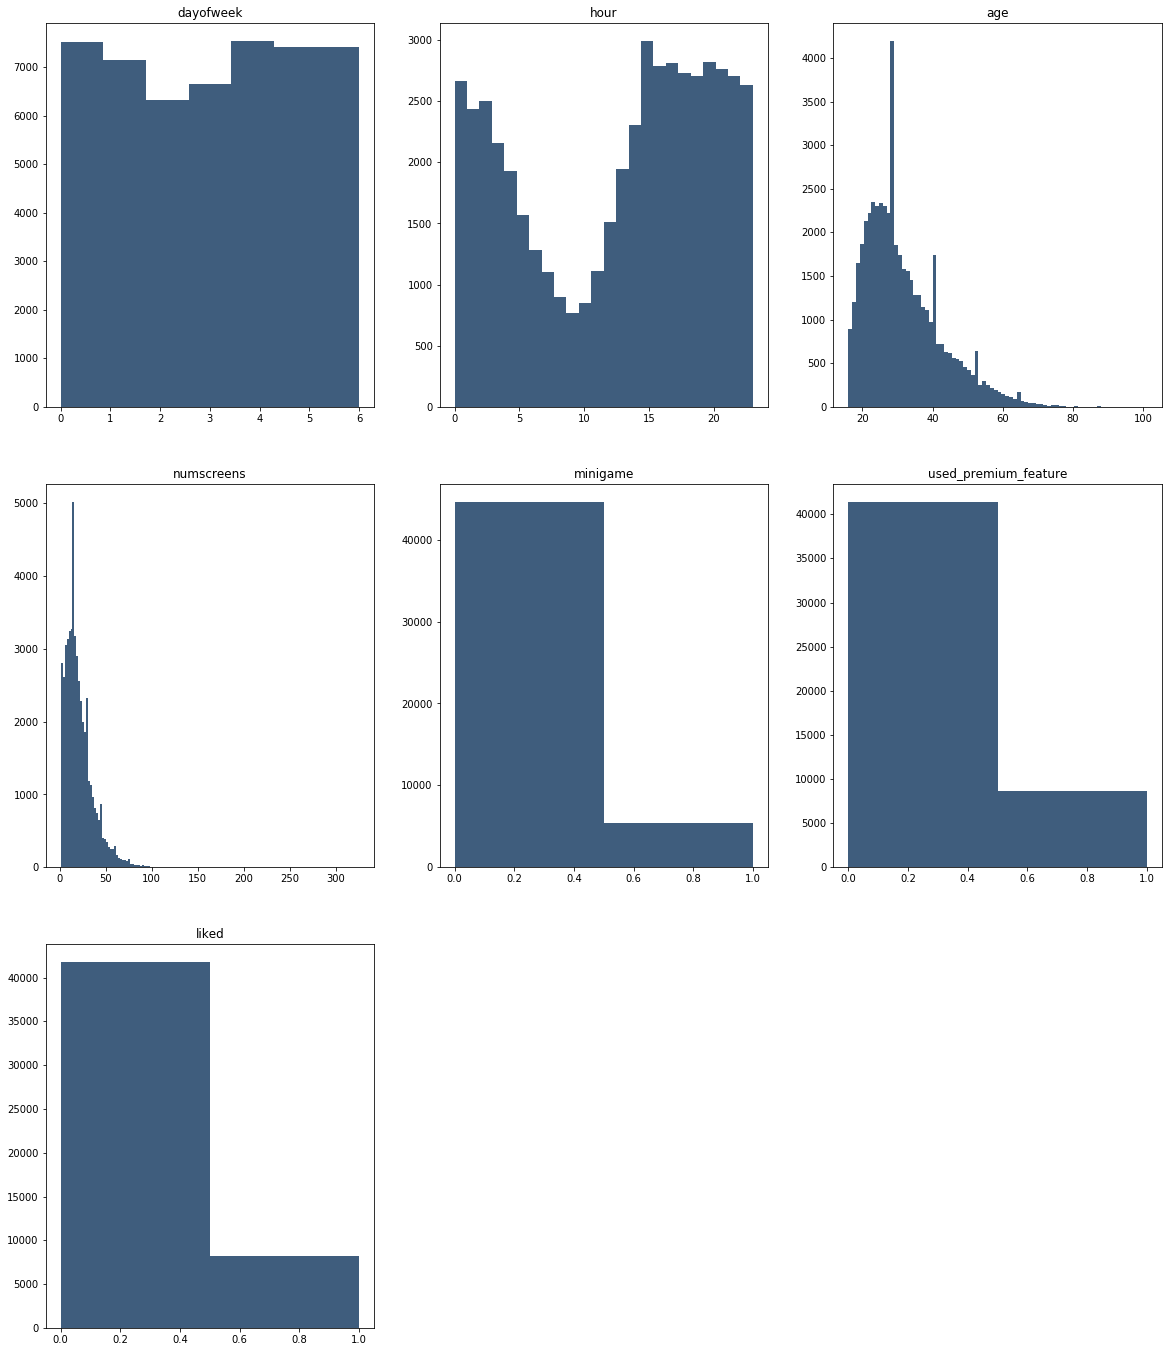

In [8]:
plt.figure(figsize = (20,24))
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f =plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color = '#3F5D7D')

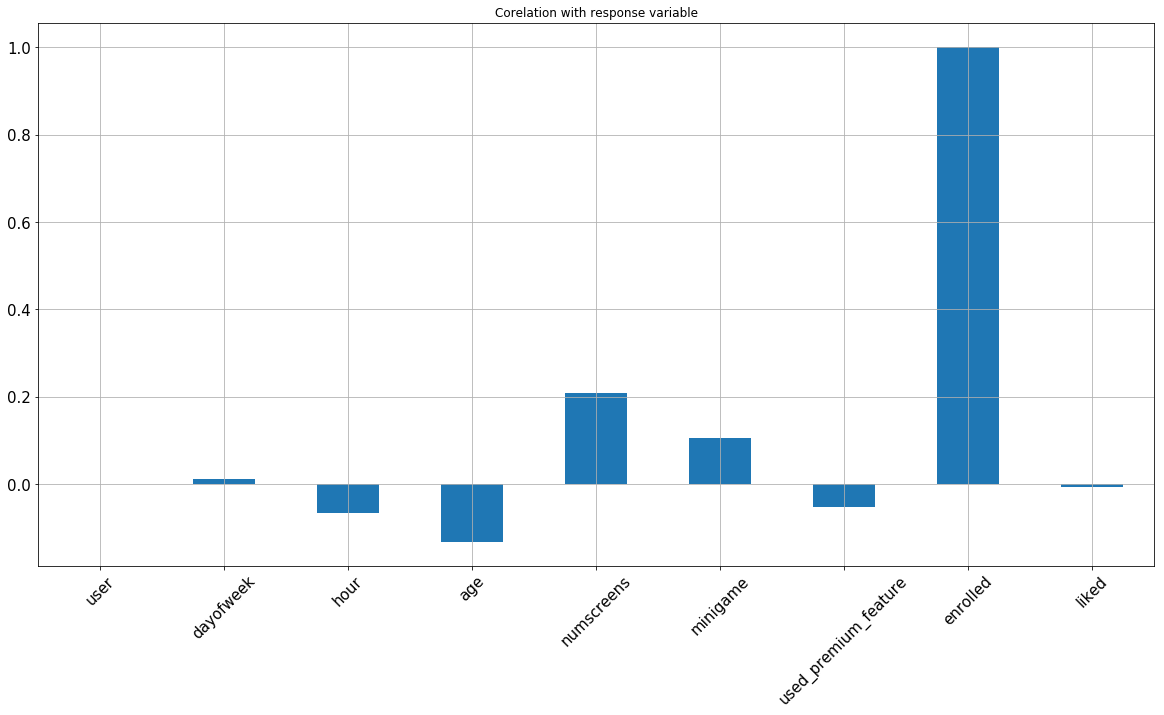

In [9]:
dataset.corrwith(dataset.enrolled).plot.bar(figsize =(20,10),
                                          title='Corelation with response variable',
                                          fontsize=15,rot = 45,
                                          grid = True)

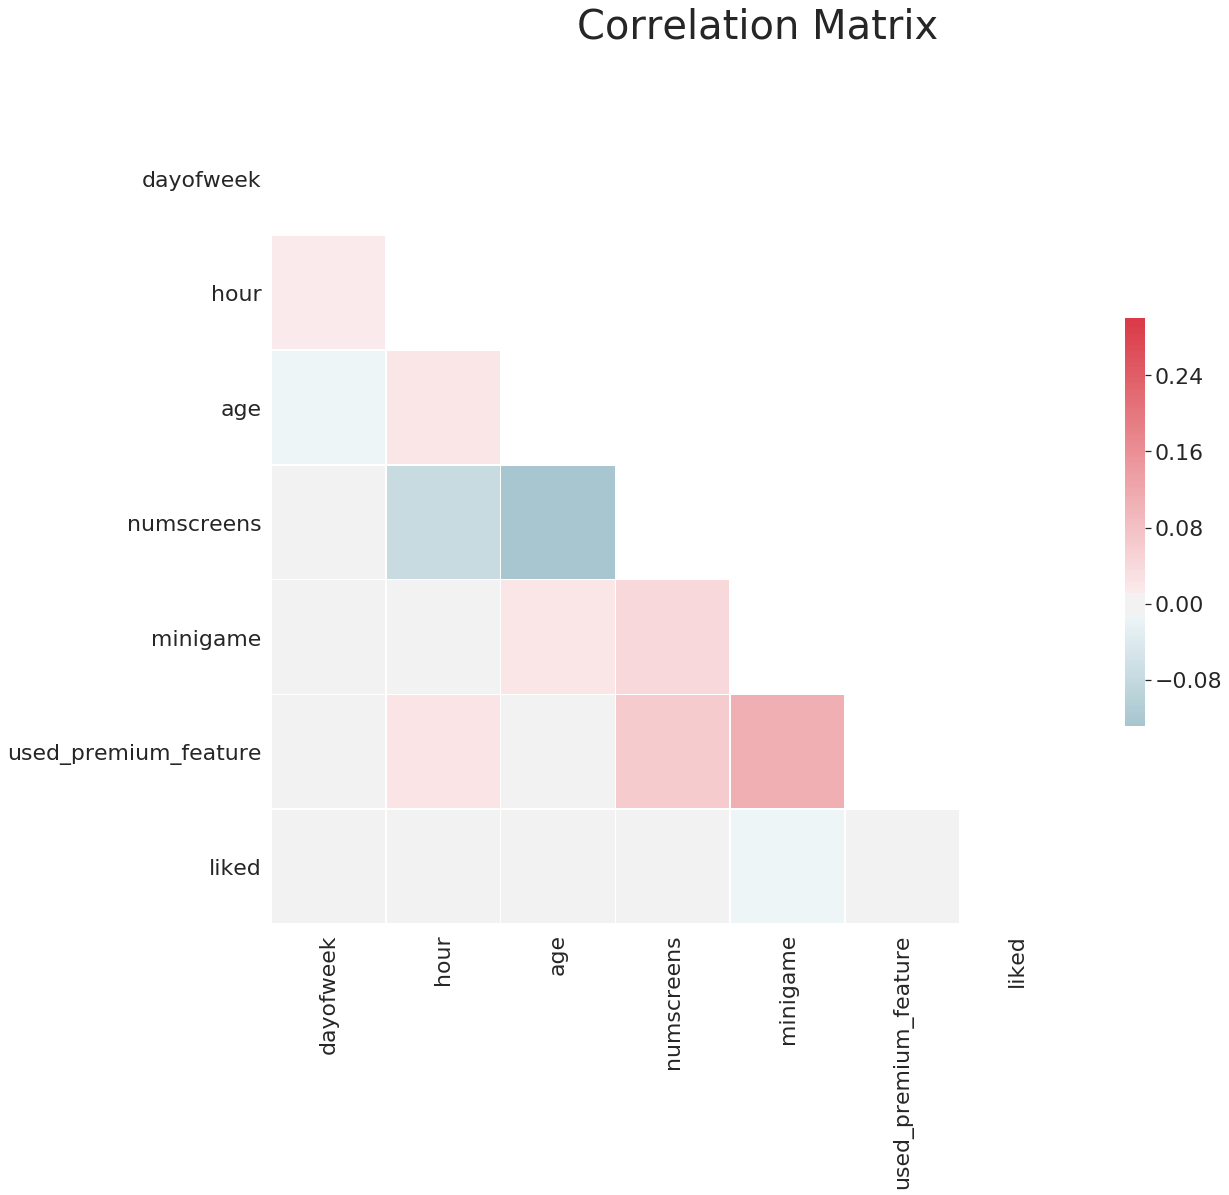

In [10]:
sn.set(style='white',font_scale=2)
corr = dataset2.corr()
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] =True
f,ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix',fontsize=40)
cmap =sn.diverging_palette(220,10,as_cmap=True)
sn.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,
          square=True,linewidths= .5,cbar_kws={'shrink':.5})

In [11]:
print(dataset.dtypes)


user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object


In [12]:
print()
dataset['first_open']  =  [parser.parse(str(row_data)) for row_data in dataset['first_open']]
dataset['enrolled_date']  =  [parser.parse(str(row_data)) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']]
print(dataset.dtypes)



user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object


In [13]:
dataset['difference'] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
dataset.head()


    

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


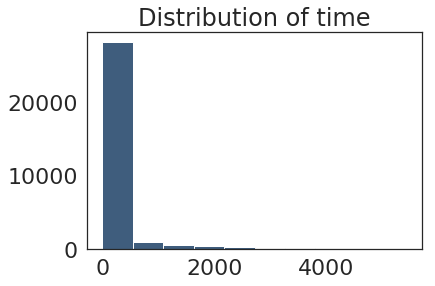

In [14]:
plt.hist(dataset['difference'].dropna(),color='#3F5D7D')
plt.title('Distribution of time')
plt.show()

Text(0.5, 1.0, 'Distribution of time')

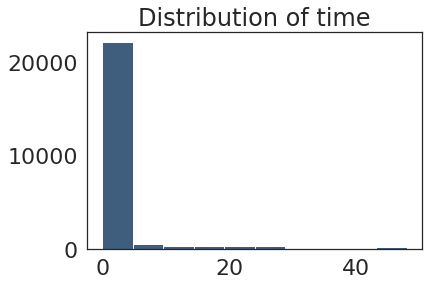

In [15]:
plt.hist(dataset['difference'].dropna(),color='#3F5D7D',range=[0,48])
plt.title('Distribution of time')

In [16]:
dataset.loc[dataset.difference>48,'enrolled']=0

In [17]:
dataset = dataset.drop(columns = ['difference','enrolled_date','first_open'])

In [18]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [19]:
top_screens= pd.read_csv('top_screens.csv').top_screens.values
dataset['screen_list'] = dataset.screen_list.astype(str)+ ','
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',',"")

In [20]:
dataset['other'] = dataset.screen_list.str.count(',')

In [21]:
dataset = dataset.drop(columns=['screen_list'])
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [22]:
savings_screen = ["Saving"+str(i) for i in range(1,11)]
savings_screen[2]='Saving2Amount'
savings_screen

['Saving1',
 'Saving2',
 'Saving2Amount',
 'Saving4',
 'Saving5',
 'Saving6',
 'Saving7',
 'Saving8',
 'Saving9',
 'Saving10']

In [23]:
dataset['SavingsCount'] = dataset[savings_screen].sum(axis=1)

In [24]:
cm_screens =['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
dataset['CMCount'] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns = cm_screens)


In [25]:
cc_screens =['CC1','CC1Category','CC3']
dataset['CCCount'] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns = cc_screens)

In [26]:
loan_screens =['Loan','Loan2','Loan3','Loan4']
dataset['LoansCount'] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns = loan_screens)

In [27]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [28]:
dataset.to_csv('new_appdata10.csv',index = False)

In [34]:
def performOps(A):
    m = len(A)
    n = len(A[0])
    B = []
    for i in range(len(A)):
        B.append([0] * n)
        for j in range(len(A[i])):
            B[i][n - 1 - j] = A[i][j]
    return B
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
B = performOps(A)
for i in range(len(B)):
    for j in range(len(B[i])):
        print(B[i][j], end = " ")

4 3 2 1 8 7 6 5 12 11 10 9 